In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [195]:
df= pd.read_csv("C:\\Users\\PC\\downloads\\telco.csv")

In [196]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [197]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [198]:
df.isnull().sum()/len(df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [201]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [207]:
df.dropna(subset=['TotalCharges'], inplace=True)


In [208]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [209]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='Count'>

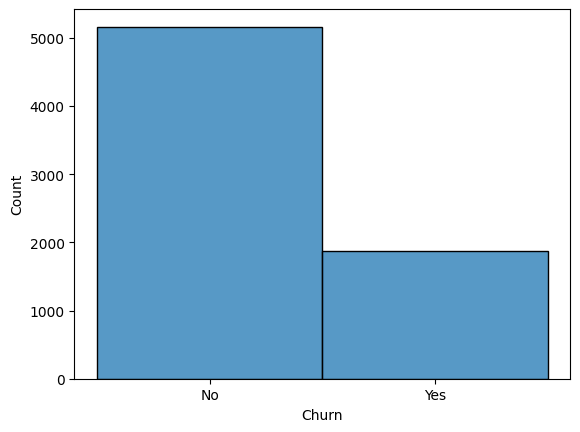

In [210]:
import seaborn as sns
sns.histplot(data=df, x= "Churn")


In [211]:
cat_columns= df.select_dtypes(include='object').columns
num_columns= df.select_dtypes(include=['int64', 'float64']).columns

In [213]:
print("Categorical columns:\n", cat_columns)
print("\nNumerical columns:\n", num_columns)

Categorical columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Numerical columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


<Axes: xlabel='InternetService', ylabel='count'>

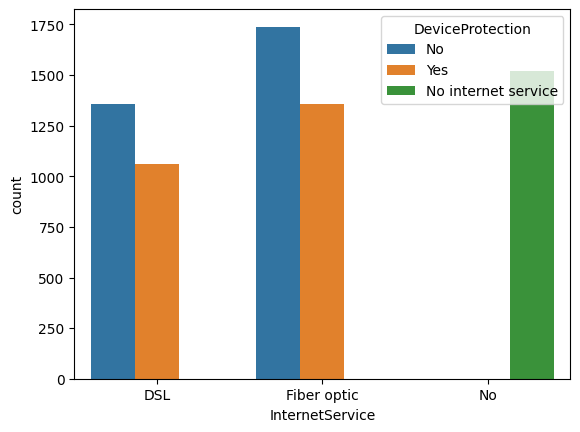

In [163]:
sns.countplot(data=df, x='InternetService', hue='DeviceProtection')

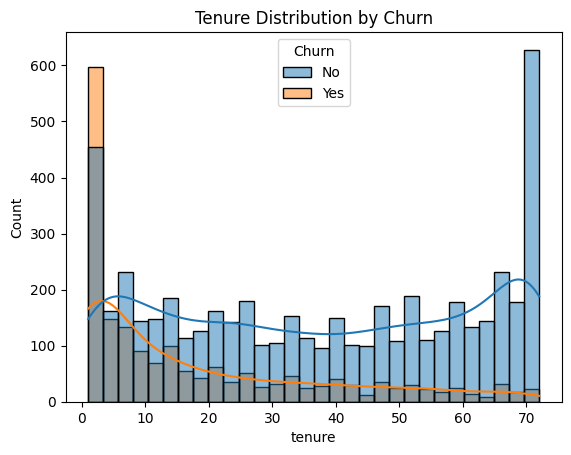

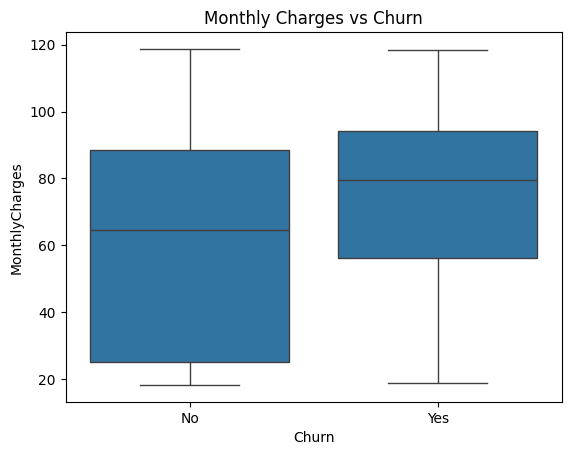

In [164]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title("Tenure Distribution by Churn")
plt.show()

sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()


In [216]:
df['Churn']= df['Churn'].map({'Yes': 1, 'No': 0})

In [218]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)



In [221]:
df.shape

(7032, 25)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df[num_columns]= scaler.fit_transform(df[num_columns])

In [242]:
df[num_columns].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03
mean,8.285623e-17,5.254298e-17,1.263052e-17,1.743012e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-4.403271e-01,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,-4.403271e-01,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,-4.403271e-01,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,-4.403271e-01,9.199259e-01,8.331482e-01,6.668271e-01
max,2.271039e+00,1.612573e+00,1.793381e+00,2.824261e+00


In [250]:
from sklearn.preprocessing import LabelEncoder

# List of binary categorical columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'MultipleLines', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies']

# Encode them to 0/1
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [243]:
from sklearn.model_selection import train_test_split

X= df.drop('Churn', axis=1)
y= df['Churn']

In [256]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [257]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [338]:
y_pred= model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(1407,))

In [341]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [342]:
y_pred = model.predict(X_test)

In [343]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(1407,))

In [344]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [345]:
print(round(accuracy_score(y_test, y_pred)*100))
print("\nconfusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n Classification:")
print( classification_report(y_test, y_pred))

73

confusion matrix:
[[723 310]
 [ 76 298]]

 Classification:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [346]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(class_weight='balanced',max_depth=10, min_samples_leaf=5, random_state=42)

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [347]:
y_predran= model.predict(X_test)

In [319]:
y_predran

array([0, 1, 0, ..., 0, 0, 0], shape=(1407,))

In [320]:
print(round(accuracy_score(y_test, y_predran)*100))
print("\nconfusion matrix:")
print(confusion_matrix(y_test, y_predran))
print("\n Classification:")
print( classification_report(y_test, y_predran))

76

confusion matrix:
[[788 245]
 [ 91 283]]

 Classification:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1033
           1       0.54      0.76      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407



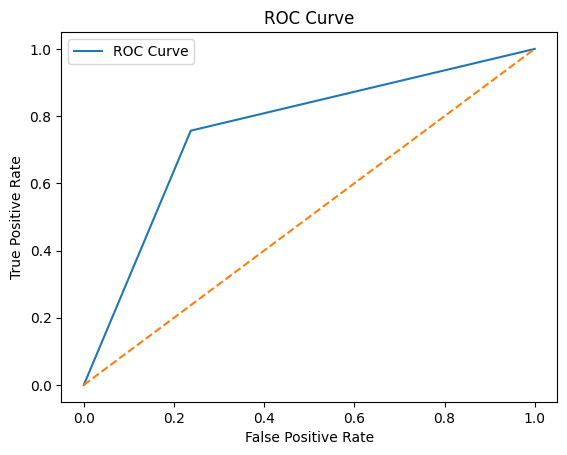

AUC Score: 0.7597556051374171


In [322]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_predran)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_predran))


In [326]:
from xgboost import XGBClassifier

model = XGBClassifier(
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [327]:
Xgb_pred= model.predict(X_test)

In [328]:
Xgb_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(1407,))

In [329]:
print(round(accuracy_score(y_test, Xgb_pred)*100))
print("\nconfusion matrix:")
print(confusion_matrix(y_test, Xgb_pred))
print("\n Classification:")
print( classification_report(y_test, Xgb_pred))

73

confusion matrix:
[[742 291]
 [ 84 290]]

 Classification:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407



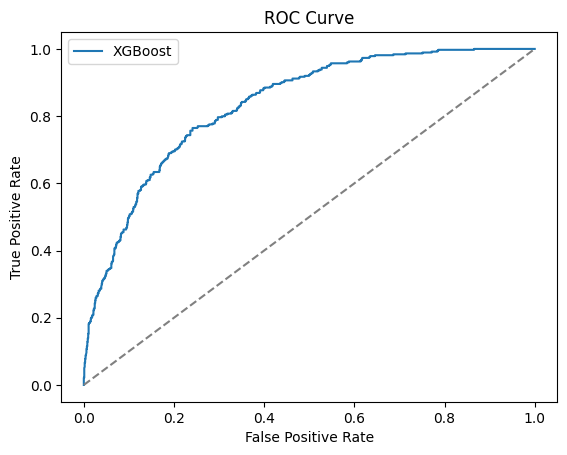

AUC Score: 0.8340136459406434


In [330]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_proba))
